<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/PADHAI_Handling_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
x= np.array([1,2,3,4,5])

In [3]:
x.sum()

15

In [4]:
print(x.dtype)

int64


In [5]:
x= np.array([1,2,3,'--',5])

In [6]:
print(x.dtype)

<U21


In [7]:
x.sum()

TypeError: ignored

In [10]:
x= np.array([1,2,3,None,5])

In [11]:
x.dtype

dtype('O')

In [9]:
x.sum()

TypeError: ignored

In [12]:
x= np.array([1,2,3,np.NaN,5])

In [13]:
x.dtype

dtype('float64')

In [14]:
x.sum()

nan

In [15]:
x_b=[True,True,True,False,True]

In [16]:
x[x_b]

array([1., 2., 3., 5.])

In [17]:
x[x_b].sum()

11.0

In [18]:
x[x_b].mean()

2.75

In [19]:
m_x=np.ma.masked_array(x,mask=[0,0,0,1,0])

In [20]:
m_x.mean()

2.75

In [23]:
df=pd.read_csv('rooms-200719-175226.csv')

In [24]:
df.head()

,Room_Number,Num_Students,Department,Occupied
0,101.0,1,Mechanical,Y
1,102.0,NaN,Empty,N
2,103.0,3,Electrical,Y
3,104.0,2,Mechanical,Y
4,105.0,NaN,Chemical,N


In [25]:
df.dtypes

Room_Number     float64
Num_Students     object
Department       object
Occupied         object
dtype: object

In [28]:
%timeit np.arange(10000,dtype=int).sum()

The slowest run took 164.89 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 22.3 µs per loop


In [29]:
%timeit np.arange(10000,dtype=object).sum()

1000 loops, best of 3: 533 µs per loop


In [31]:
df.Room_Number.isnull()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Room_Number, dtype: bool

In [32]:
df.Room_Number.isnull().sum()

1

In [33]:
df.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,False
7,False,True,False,False
8,False,False,False,True
9,False,False,False,False


In [34]:
df.isnull().sum()

Room_Number     1
Num_Students    3
Department      0
Occupied        1
dtype: int64

In [4]:
missing_values=['NA','n/a','na']

In [6]:
df=pd.read_csv('rooms-200719-175226.csv',na_values=missing_values)

In [37]:
df.head()

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,Empty,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N


In [38]:
df.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,False
7,False,True,False,False
8,False,True,False,True
9,False,False,False,False


In [41]:
df.Num_Students.mean()

2.0

In [2]:
missing_values=['NA','n/a','na','Empty','--']

In [5]:
df=pd.read_csv('rooms-200719-175226.csv',na_values=missing_values)

In [9]:
df.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,True,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,True
7,False,True,False,False
8,False,True,False,True
9,False,False,False,False


In [6]:
df.Department.unique()

array(['Mechanical', nan, 'Electrical', 'Chemical', 'Civil', 'CS'],
      dtype=object)

In [7]:
df.Occupied.fillna("N",inplace=True)

In [8]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,NaN,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,N
7,108.0,NaN,CS,Y
8,109.0,NaN,Mechanical,N
9,110.0,2.0,CS,N


In [9]:
def convert_to_binary(v):
  if v == 'Y':
    return True
  else:
    return False

In [ ]:
df.Occupied.apply(convert_to_binary)

In [10]:
df.Occupied = df.Occupied.apply(convert_to_binary)

In [11]:
df.head()

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,True
1,102.0,NaN,NaN,False
2,103.0,3.0,Electrical,True
3,104.0,2.0,Mechanical,True
4,105.0,NaN,Chemical,False


In [13]:
df["Dept2"]=df.Department

In [14]:
df.Department.fillna(method='ffill',inplace=True)

In [15]:
df.head()

,Room_Number,Num_Students,Department,Occupied,Dept2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,NaN,Mechanical,False,NaN
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,NaN,Chemical,False,Chemical


In [16]:
df.Num_Students.fillna(df.Num_Students.median(),inplace=True)

In [17]:
df.head()

,Room_Number,Num_Students,Department,Occupied,Dept2
0,101.0,1.0,Mechanical,True,Mechanical
1,102.0,2.0,Mechanical,False,NaN
2,103.0,3.0,Electrical,True,Electrical
3,104.0,2.0,Mechanical,True,Mechanical
4,105.0,2.0,Chemical,False,Chemical


In [18]:
df.Room_Number.interpolate()

0    101.0
1    102.0
2    103.0
3    104.0
4    105.0
5    106.0
6    107.0
7    108.0
8    109.0
9    110.0
Name: Room_Number, dtype: float64

http://research.aspiringminds.com/resources/#datasets

In [3]:
df = pd.read_excel('Ameo_2015.xlsx')

In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
df.drop(df.columns[0], axis = 1,inplace=True) 

In [8]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
df.shape

(3998, 38)

In [10]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [11]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

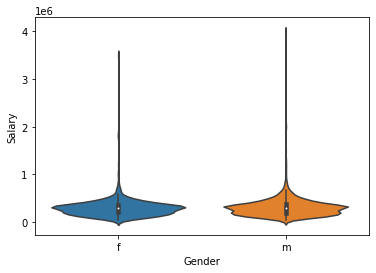

In [16]:
sns.violinplot(x='Gender',y='Salary',data=df);

In [17]:
df[['10percentage','12percentage','collegeGPA','Gender']].groupby('Gender').mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [19]:
df[['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Gender']].groupby('Gender').mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [20]:
df[['Salary','Gender']].groupby('Gender').mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [22]:
th=df.Salary.mean()+ df.Salary.std()

In [23]:
th

520437.3498818199

In [24]:
df['HighIncome']=(df.Salary >th)

In [25]:
df.sample(10)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,HighIncome
3111,1192843,330000,2014-03-01,present,software engineer,Chennai,m,1992-03-24,85.30,state board,2009,92.2,state board,3629,2,B.Tech/B.E.,electronics and communication engineering,70.24,3629,0,Andhra Pradesh,2013,595,690,465,-1.000000,465,-1,346,-1,-1,-1,-1,-0.3027,-0.6201,-1.2196,-0.36120,-0.4776,False
1384,1098764,120000,2014-05-01,2015-01-01 00:00:00,software engineer,Lucknow,m,1993-06-21,73.00,cbse,2010,60.0,cbse,2819,2,B.Tech/B.E.,computer science & engineering,66.76,2819,0,Uttar Pradesh,2014,525,410,345,0.842248,355,-1,469,-1,-1,-1,-1,0.2718,0.7119,0.9322,-1.37530,0.0973,False
3280,1187208,240000,2014-03-01,2014-06-01 00:00:00,sales trainer,New Delhi,m,1991-07-31,90.60,cbse,2009,78.0,cbse,8351,1,B.Tech/B.E.,electronics and communication engineering,62.00,8351,0,Karnataka,2013,710,565,690,0.338786,395,292,-1,-1,-1,-1,-1,-1.0208,0.3789,-1.2196,-0.99500,-0.0943,False
1141,1207752,180000,2014-04-01,2014-07-01 00:00:00,talent acquisition specialist,Noida,f,1992-12-12,86.50,cbse,2010,72.4,cbse,2813,2,B.Tech/B.E.,information technology,75.00,2813,0,Madhya Pradesh,2014,535,505,235,0.744758,445,-1,438,-1,-1,-1,-1,0.2718,0.5454,1.0859,-1.50210,0.8637,False
3260,1274331,180000,2014-10-01,present,embedded software engineer,Lucknow,m,1992-08-13,62.30,state board,2009,75.6,state board,6906,1,B.Tech/B.E.,electronics engineering,73.12,6906,0,Uttar Pradesh,2014,525,460,570,0.943272,-1,452,-1,-1,-1,-1,-1,-0.0154,1.2114,-0.6048,1.03330,1.4386,False
3051,525682,360000,2013-03-01,present,software engineer,Bangalore,m,1990-10-04,83.66,board of secondary education,2008,93.9,board of intermediate education,3026,2,B.Tech/B.E.,computer science & engineering,73.31,3026,1,Telangana,2012,485,640,735,0.930371,565,-1,-1,-1,-1,-1,-1,1.2056,0.9688,-0.4891,-0.61340,0.0284,False
2776,246558,480000,2011-08-01,2014-05-01 00:00:00,software developer,Bangalore,m,1989-11-12,89.00,0,2007,83.0,0,6570,2,B.Tech/B.E.,computer engineering,81.00,6570,0,Orissa,2011,345,505,595,0.974396,615,-1,-1,-1,-1,-1,-1,1.2828,0.0328,0.2366,-1.70040,-0.4455,False
558,597624,185000,2015-03-01,2015-04-01 00:00:00,qa analyst,Noida,f,1990-06-09,71.30,cbse,2007,71.4,cbse,47,1,B.Tech/B.E.,computer science & engineering,69.40,47,1,Delhi,2013,465,450,605,0.704090,465,-1,-1,-1,-1,-1,-1,-0.1590,1.5444,2.1617,1.79400,1.4386,False
2926,359595,120000,2014-05-01,2015-05-01 00:00:00,software tester,Chennai,f,1991-04-06,79.00,state board,2008,79.4,state board,1245,2,B.Tech/B.E.,electronics and communication engineering,79.30,1245,1,Tamil Nadu,2012,365,435,365,0.229482,415,266,-1,-1,-1,473,-1,-0.8810,-0.9033,0.6720,-0.08460,-0.4455,False
2607,345100,200000,2013-05-01,2015-05-01 00:00:00,technical support engineer,Ghaziabad,f,1990-08-28,76.40,cbse,2008,65.5,cbse,172,2,B.Tech/B.E.,electronics and communication engineering,59.94,172,0,Uttar Pradesh,2012,485,324,525,0.376060,-1,300,-1,-1,-1,340,-1,0.3941,1.2808,1.3977,2.47123,-0.1295,False


In [28]:
df[['Salary','HighIncome','Gender']].groupby(['HighIncome','Gender']).mean()

Salary
HighIncome Gender               
False      f       271499.454744
           m       272598.433606
True       f       832250.000000
           m       785344.827586

In [29]:
df[['Salary','HighIncome','Gender']].groupby(['HighIncome','Gender']).count()

Salary
HighIncome Gender        
False      f          917
           m         2809
True       f           40
           m          232

In [30]:
print("Low income female percentage",917/(2809+917)*100)

low income female percentage 24.610842726784757


In [31]:
print("High income female percentage",40/(232+40)*100)

High income female percentage 14.705882352941178


In [34]:
df.CollegeTier.unique()

array([2, 1])

In [35]:
df[['CollegeTier','HighIncome','Salary']].groupby(['HighIncome','CollegeTier']).mean()

Salary
HighIncome CollegeTier               
False      1            340619.658120
           2            267751.718213
True       1            820238.095238
           2            783803.827751

In [36]:
df[['CollegeTier','HighIncome','Salary']].groupby(['HighIncome','CollegeTier']).count()

Salary
HighIncome CollegeTier        
False      1               234
           2              3492
True       1                63
           2               209

In [37]:
print("Low income college tier 2 percentage is",3492/(3492+234)*100)

High income college tier 2 percentage is 93.71980676328504


In [38]:
print("High income college tier 2 percentage is",209/(209+63)*100)

High income college tier 2 percentage is 76.83823529411765


In [41]:
df[['Gender','CollegeTier','Salary']].groupby(['CollegeTier','Gender']).mean()

Salary
CollegeTier Gender               
1           f       414313.725490
            m       448170.731707
2           f       288217.439294
            m       299706.261181

In [42]:
df[['Gender','CollegeTier','Salary']].groupby(['CollegeTier','Gender']).count()

Salary
CollegeTier Gender        
1           f           51
            m          246
2           f          906
            m         2795

In [45]:
print("In college tier 1 female percentage is",51/(51+246)*100)

In college tier 1 female percentage is 17.17171717171717


In [44]:
print("In college tier 2 female percentage is",906/(906+2795)*100)

In college tier 2 female percentage is 24.479870305322883


In [53]:
df= pd.read_csv('apy-200719-175226.csv',na_values="=")

In [54]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [48]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [49]:
df.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [55]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [51]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [52]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [56]:
pd.to_numeric(df.Production)

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 246091, dtype: float64

In [57]:
df.Production.isnull().sum()

3727

In [58]:
df.shape

(246091, 7)

In [59]:
df.dropna(inplace=True)

In [60]:
df.shape

(242364, 7)

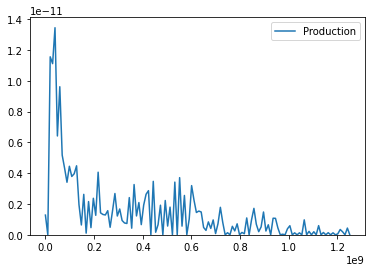

In [61]:
sns.kdeplot(df.Production);

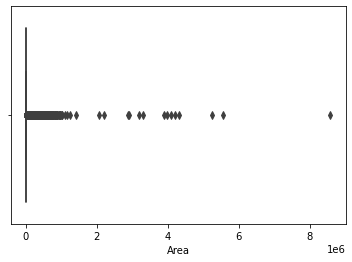

In [62]:
sns.boxplot(df.Area);

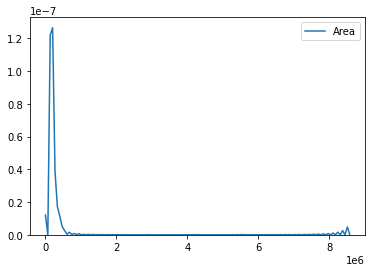

In [63]:
sns.kdeplot(df.Area);

In [64]:
df[df['State_Name']=='Karnataka']

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
76865,Karnataka,BAGALKOT,1998,Kharif,Arhar/Tur,6154.0,2602.0
76866,Karnataka,BAGALKOT,1998,Kharif,Bajra,48855.0,52375.0
76867,Karnataka,BAGALKOT,1998,Kharif,Castor seed,71.0,61.0
76868,Karnataka,BAGALKOT,1998,Kharif,Cotton(lint),15225.0,22129.0
76869,Karnataka,BAGALKOT,1998,Kharif,Groundnut,16368.0,7734.0
...,...,...,...,...,...,...,...
97981,Karnataka,YADGIR,2014,Summer,Onion,7.0,34.0
97982,Karnataka,YADGIR,2014,Summer,Rice,15205.0,35029.0
97983,Karnataka,YADGIR,2014,Summer,Sunflower,14.0,5.0
97984,Karnataka,YADGIR,2014,Whole Year,Coconut,168.0,1499.0


In [66]:
df[df['State_Name']=='Karnataka']['District_Name'].unique()

array(['BAGALKOT', 'BANGALORE RURAL', 'BELGAUM', 'BELLARY',
       'BENGALURU URBAN', 'BIDAR', 'BIJAPUR', 'CHAMARAJANAGAR',
       'CHIKBALLAPUR', 'CHIKMAGALUR', 'CHITRADURGA', 'DAKSHIN KANNAD',
       'DAVANGERE', 'DHARWAD', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI',
       'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAICHUR',
       'RAMANAGARA', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTAR KANNAD',
       'YADGIR'], dtype=object)

In [67]:
df.groupby(['State_Name','Crop','Crop_Year']).sum()

Area  Production
State_Name                  Crop     Crop_Year                       
Andaman and Nicobar Islands Arecanut 2000         4354.00     7200.00
                                     2001         4354.00     7300.00
                                     2002         4363.00     7350.00
                                     2003         4379.00     6707.00
                                     2004         4425.37     4781.05
...                                                   ...         ...
West Bengal                 Wheat    2010       316808.00   874415.00
                                     2011       315659.00   872895.00
                                     2012       321572.00   895927.00
                                     2013       331481.00   927837.00
                                     2014       334640.00   939254.00

[12896 rows x 2 columns]

In [68]:
df[df['State_Name']=='West Bengal']['Crop'].unique()

array(['Rice', 'Jute', 'Mesta', 'Urad', 'Gram', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Oilseeds total', 'Wheat', 'Arecanut',
       'Arhar/Tur', 'Coconut ', 'Dry chillies', 'Groundnut', 'Linseed',
       'Maize', 'Potato', 'Pulses total', 'Rapeseed &Mustard', 'Sesamum',
       'Sugarcane', 'Turmeric', 'Dry ginger', 'Sunflower',
       'Peas & beans (Pulses)', 'Cotton(lint)', 'Safflower', 'Garlic',
       'Barley', 'Bajra', 'Horse-gram', 'Other Kharif pulses', 'Soyabean',
       'Jowar', 'Niger seed', 'Sannhamp', 'Small millets', 'Tobacco',
       'Ragi', 'Other  Rabi pulses', 'Cardamom', 'Castor seed', 'Moth'],
      dtype=object)

In [69]:
df.groupby(['State_Name','Crop_Year']).sum()

Area   Production
State_Name                  Crop_Year                         
Andaman and Nicobar Islands 2000         44518.00  89060914.00
                            2001         41163.00  89718700.00
                            2002         45231.40  94387137.67
                            2003         44799.40  95296454.67
                            2004         45308.77  87186497.63
...                                           ...          ...
West Bengal                 2010       7246875.00  38308645.00
                            2011       7755360.00  36777774.00
                            2012       7850936.00  38918275.00
                            2013       7999815.00  37901281.00
                            2014       8058390.00  43584403.00

[519 rows x 2 columns]

In [70]:
df_=df.groupby(['State_Name','Crop_Year']).sum()

In [71]:
df_.reset_index(inplace=True)

In [72]:
df_.head()

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,44518.00,89060914.00
1,Andaman and Nicobar Islands,2001,41163.00,89718700.00
2,Andaman and Nicobar Islands,2002,45231.40,94387137.67
3,Andaman and Nicobar Islands,2003,44799.40,95296454.67
4,Andaman and Nicobar Islands,2004,45308.77,87186497.63


In [75]:
df_[['Crop_Year','State_Name']].groupby('State_Name').count()

,Crop_Year
State_Name,
Andaman and Nicobar Islands,8
Andhra Pradesh,18
Arunachal Pradesh,18
Assam,18
Bihar,18
Chandigarh,13
Chhattisgarh,15
Dadra and Nagar Haveli,17
Goa,12


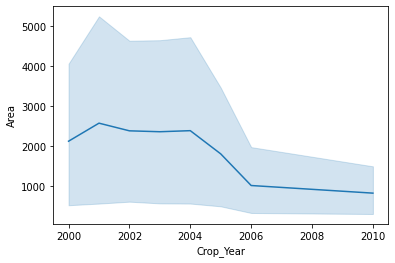

In [76]:
sns.lineplot(x='Crop_Year',y='Area',data=df[df['State_Name']=='Andaman and Nicobar Islands']);

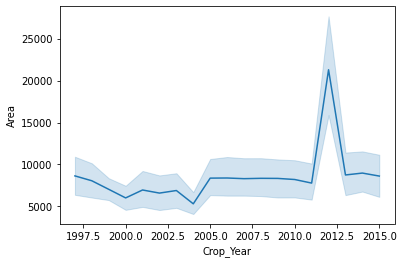

In [78]:
sns.lineplot(x='Crop_Year',y='Area',data=df[df['State_Name']=='Odisha']);

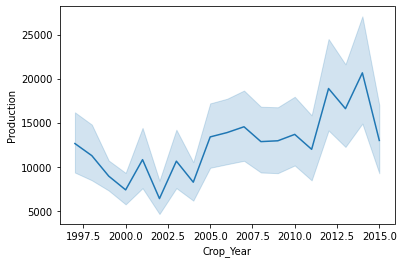

In [79]:
sns.lineplot(x='Crop_Year',y='Production',data=df[df['State_Name']=='Odisha']);

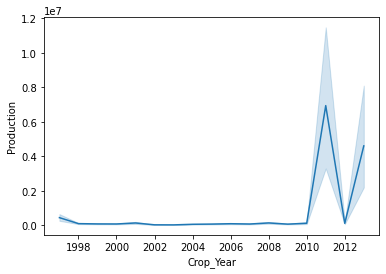

In [80]:
sns.lineplot(x='Crop_Year',y='Production',data=df[df['State_Name']=='Tamil Nadu']);

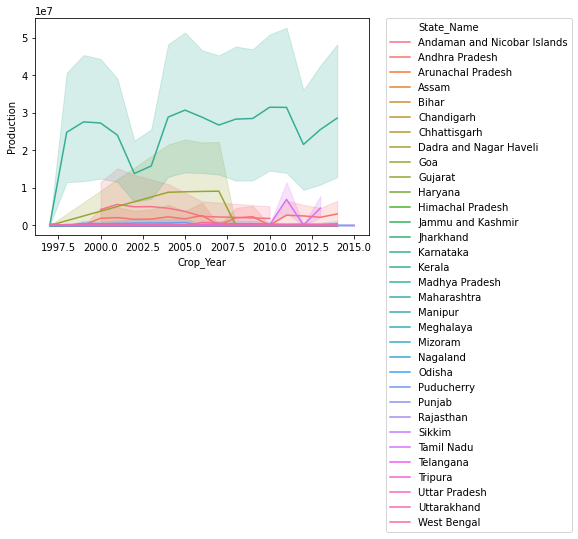

In [82]:
sns.lineplot(x='Crop_Year',y='Production',data=df,hue='State_Name');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [87]:
!pip install plotly_express

In [88]:
import plotly_express as px

In [90]:
px.scatter(df_,x='Area',y='Production',animation_frame='Crop_Year',animation_group='State_Name',color='State_Name')

In [96]:
df_.sort_values('Crop_Year',inplace=True)

In [99]:
df[(df['State_Name']=='Kerala')& (df['Crop_Year']==2000)]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
98020,Kerala,ALAPPUZHA,2000,Autumn,Rice,9808.0,16384.0
98021,Kerala,ALAPPUZHA,2000,Kharif,Sesamum,617.0,201.0
98022,Kerala,ALAPPUZHA,2000,Summer,Rice,17536.0,55953.0
98023,Kerala,ALAPPUZHA,2000,Whole Year,Arecanut,2205.0,917.0
98024,Kerala,ALAPPUZHA,2000,Whole Year,Banana,595.0,4134.0
...,...,...,...,...,...,...,...
101985,Kerala,WAYANAD,2000,Whole Year,Sugarcane,2.0,200.0
101986,Kerala,WAYANAD,2000,Whole Year,Sweet potato,12.0,140.0
101987,Kerala,WAYANAD,2000,Whole Year,Tapioca,1620.0,54917.0
101988,Kerala,WAYANAD,2000,Whole Year,Turmeric,139.0,262.0


In [100]:
df[(df['State_Name']=='Kerala')& (df['Crop_Year']==2000)].sort_values('Production')

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
99868,Kerala,KOTTAYAM,2000,Kharif,Sesamum,6.0,1.0
100437,Kerala,MALAPPURAM,2000,Kharif,Ragi,4.0,3.0
99567,Kerala,KOLLAM,2000,Summer,Rice,4.0,4.0
98946,Kerala,KANNUR,2000,Kharif,Sesamum,10.0,6.0
98604,Kerala,IDUKKI,2000,Kharif,Ragi,8.0,7.0
...,...,...,...,...,...,...,...
101702,Kerala,THRISSUR,2000,Whole Year,Coconut,89472.0,540000000.0
98953,Kerala,KANNUR,2000,Whole Year,Coconut,96975.0,621000000.0
100445,Kerala,MALAPPURAM,2000,Whole Year,Coconut,110378.0,626000000.0
101425,Kerala,THIRUVANANTHAPURAM,2000,Whole Year,Coconut,88663.0,635000000.0


In [104]:
df_=df[df['Crop'].isin(['Rice','Wheat','Maize','Ragi'])].groupby(['State_Name','Crop_Year']).sum()

In [105]:
df_.head()

Area  Production
State_Name                  Crop_Year                      
Andaman and Nicobar Islands 2000       10881.00    32184.00
                            2001        9801.00    27333.00
                            2002       10885.00    32111.66
                            2003       10561.37    30850.87
                            2004       10734.92    29192.23

In [106]:
df_.reset_index(inplace=True)

In [107]:
df_.head()

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,10881.00,32184.00
1,Andaman and Nicobar Islands,2001,9801.00,27333.00
2,Andaman and Nicobar Islands,2002,10885.00,32111.66
3,Andaman and Nicobar Islands,2003,10561.37,30850.87
4,Andaman and Nicobar Islands,2004,10734.92,29192.23


In [108]:
df_.sort_values('Crop_Year',inplace=True)

In [109]:
px.scatter(df_,x='Area',y='Production',animation_frame='Crop_Year',animation_group='State_Name',color='State_Name')

In [110]:
df_['Efficiency']=df_['Production']/df_['Area']

In [113]:
px.scatter(df_,x='Area',y='Efficiency',size='Production',animation_frame='Crop_Year',
           animation_group='State_Name',color='State_Name',range_y=[0.75,5],range_x=[-1E6,20E6])